In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, auc
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.metrics as mt
from plotly import tools
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')


In [2]:
df1=pd.read_csv('mydf.csv')

In [3]:
df1.shape

(4694, 17210)

In [4]:
ls

 As3Q4.ipynb*      notebook136dfcafc5.ipynb
 As3Q5.ipynb*      Untitled1.ipynb
 As4Q4.ipynb       Untitled2-Copy1.ipynb
 As4Q5.ipynb       Untitled2.ipynb
 dafinal.ipynb     Untitled.ipynb
 dvprjct11.ipynb  'Womens Clothing E-Commerce Reviews.csv'
 dvprjct.ipynb     y_test.txt
 mydf.csv          y_train.txt


In [5]:
y_train=np.loadtxt('y_train.txt')
y_test=np.loadtxt('y_test.txt')

In [6]:
Ntot=df1.shape[0]

In [7]:
xtrain=df1.iloc[:int(0.8*Ntot)].to_numpy()
xtest=df1.iloc[int(0.8*Ntot):].to_numpy()

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Scaling using StanScaler
scaler= StandardScaler()
scaler.fit(xtrain)
xtrain=scaler.transform(xtrain)
xtest=scaler.transform(xtest)
#12 comp PCA
K=40
pca = PCA(n_components=K)
pca.fit(xtrain)
xtrain=pca.transform(xtrain)
xtest=pca.transform(xtest)


In [8]:

start=dt.datetime.now()
lr = LogisticRegression()
lr.fit(xtrain,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))
lr.score(xtest, y_test)


Elapsed time:  0:00:01.718686


0.8178913738019169

In [9]:

start=dt.datetime.now()
svm = SVC()
svm.fit(xtrain,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))
svm.score(xtest, y_test)

Elapsed time:  0:00:00.774803


0.8242811501597445

In [10]:
start=dt.datetime.now()
nn = MLPClassifier()
nn.fit(xtrain,y_train)
print('Elapsed time: ',str(dt.datetime.now()-start))
nn.score(xtest, y_test)

Elapsed time:  0:00:03.323593


0.7529286474973376

In [11]:

# importing random forest classifier from assemble module
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)  
clf.fit(xtrain, y_train)
y_pred = clf.predict(xtest)
from sklearn import metrics  
clf.score(xtest, y_test)

# using metrics module for accuracy calculation
# print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

0.7763578274760383

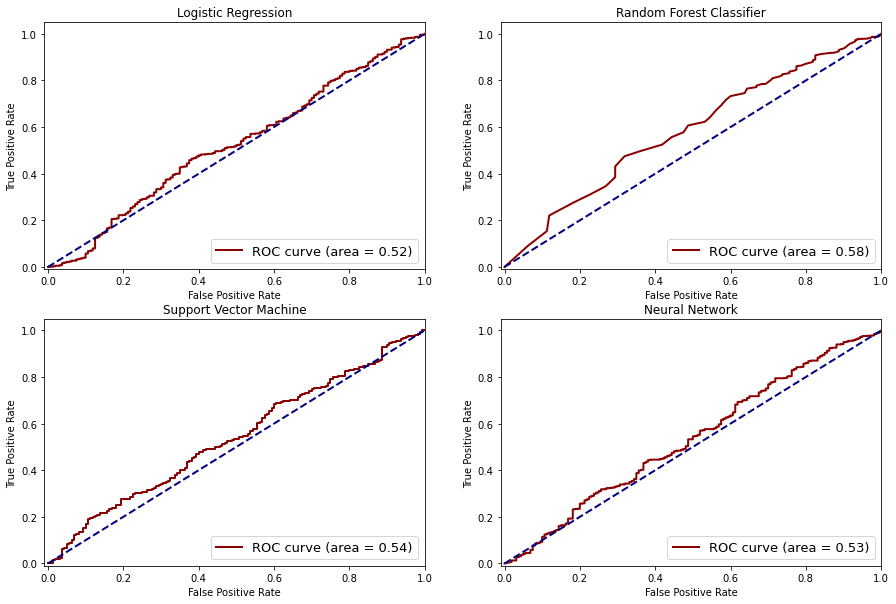

In [12]:
# ROC Curves and AUC

# Logistic Regression Plot
pred_lr = lr.predict_proba(xtest)[:,1]
fpr_lr,tpr_lr,_ = roc_curve(y_test,pred_lr)
roc_auc_lr = auc(fpr_lr,tpr_lr)

f, axes = plt.subplots(2, 2,figsize=(15,10))
axes[0,0].plot(fpr_lr, tpr_lr, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_lr))
axes[0,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Logistic Regression')
axes[0,0].legend(loc='lower right', fontsize=13)

# # Multinominal Naive Bayes Plot
# pred_nb = nb.predict_proba(xtest)[:,1]
# fpr_nb,tpr_nb,_ = roc_curve(y_test.values,pred_nb)
# roc_auc_nb = auc(fpr_nb,tpr_nb)

# axes[0,1].plot(fpr_nb, tpr_nb, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nb))
# axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
# axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Naive Bayes')
# axes[0,1].legend(loc='lower right', fontsize=13)

# ROC Curve for Random Forest Classifier
pred_clf = clf.predict_proba(xtest)[:,1]
fpr_clf,tpr_clf,_ = roc_curve(y_test,pred_clf)
roc_auc_clf = auc(fpr_clf,tpr_clf)

axes[0,1].plot(fpr_clf, tpr_clf, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_clf))
axes[0,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[0,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Random Forest Classifier')
axes[0,1].legend(loc='lower right', fontsize=13)



#SVM
pred_svm = svm.decision_function(xtest)
fpr_svm,tpr_svm,_ = roc_curve(y_test,pred_svm)
roc_auc_svm = auc(fpr_svm,tpr_svm)

axes[1,0].plot(fpr_svm, tpr_svm, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_svm))
axes[1,0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,0].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,0].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Support Vector Machine')
axes[1,0].legend(loc='lower right', fontsize=13)

# Neural Network
pred_nn = nn.predict_proba(xtest)[:,1]
fpr_nn,tpr_nn,_ = roc_curve(y_test,pred_nn)
roc_auc_nn = auc(fpr_nn,tpr_nn)

axes[1,1].plot(fpr_nn, tpr_nn, color='darkred', lw=2, label='ROC curve (area = {:0.2f})'.format(roc_auc_nn))
axes[1,1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[1,1].set(xlim=[-0.01, 1.0], ylim=[-0.01, 1.05])
axes[1,1].set(xlabel ='False Positive Rate', ylabel = 'True Positive Rate', title = 'Neural Network')
axes[1,1].legend(loc='lower right', fontsize=13);



In [13]:
X_test=xtest

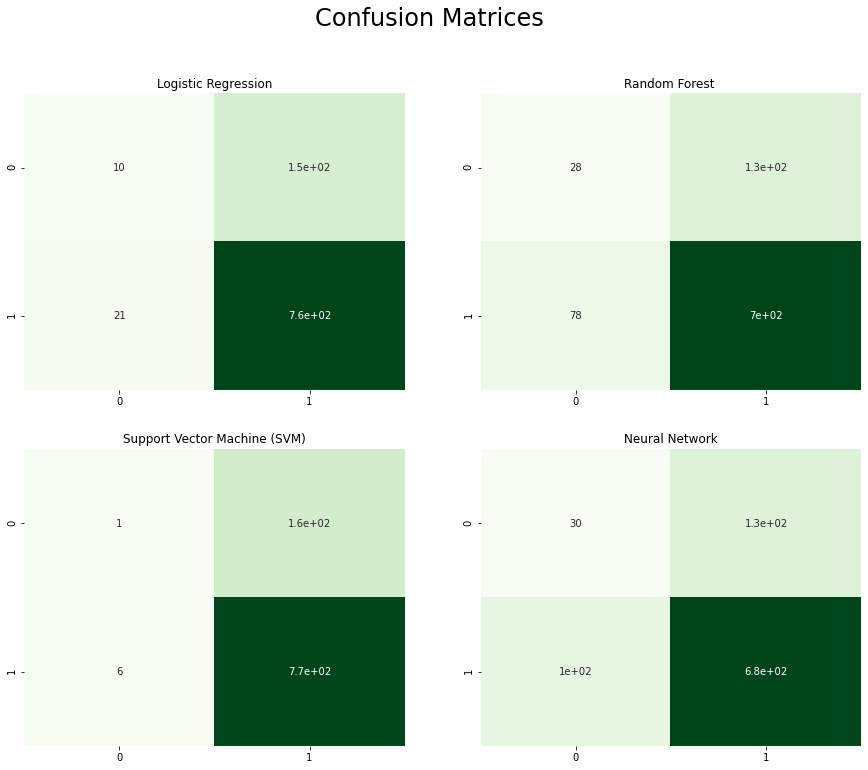

In [14]:
# confusion matrix for LR, NB,SVM, NN
lr_cm=confusion_matrix(y_test, lr.predict(X_test))
# nb_cm=confusion_matrix(y_test, nb.predict(X_test))
clf_cm=confusion_matrix(y_test,clf.predict(X_test))
svm_cm=confusion_matrix(y_test, svm.predict(X_test))
nn_cm=confusion_matrix(y_test, nn.predict(X_test))

plt.figure(figsize=(15,12))
plt.suptitle("Confusion Matrices",fontsize=24)

plt.subplot(2,2,1)
plt.title("Logistic Regression")
sns.heatmap(lr_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,2)
plt.title("Random Forest ")
sns.heatmap(clf_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,3)
plt.title("Support Vector Machine (SVM)")
sns.heatmap(svm_cm, annot = True, cmap="Greens",cbar=False);

plt.subplot(2,2,4)
plt.title("Neural Network")
sns.heatmap(nn_cm, annot = True, cmap="Greens",cbar=False);